https://www.datacamp.com/community/tutorials/xgboost-in-python

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/LatexPackage/miktex/bin/x64'

In [2]:
os.environ["PATH"] += os.pathsep + 'D:/Database/Bitfinex-historical-data-master/Bitfinex-historical-data-master'

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
from sklearn.datasets import load_boston

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [6]:
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

import pandas as pd
import urllib.request
     

from IPython.display import clear_output

In [7]:
## Loading BTC and XRP Data

In [8]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [9]:
BTC_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master\Bitfinex-historical-data-master\BTCUSD\Candles_1m'

In [10]:
BTC_2019 = pd.read_csv(BTC_USD_1min_path + '/2019/merged.csv', header=None ,names =  ['btc_' + d for d in header_format])

In [11]:
BTC_2018 = pd.read_csv(BTC_USD_1min_path + '/2018/merged.csv', header=None ,names =  ['btc_' + d for d in header_format])

In [12]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [13]:
XRP_2018 = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None, names = ['xrp_' + d for d in header_format])

In [14]:
XRP_2019 = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None , names =  ['xrp_' + d for d in header_format])

In [15]:
btc_xrp_merged_2019 = BTC_2019.merge(XRP_2019, 
               left_on = 'btc_timestamp_UTC_millisec', 
               right_on = 'xrp_timestamp_UTC_millisec', 
               how = 'outer')

In [16]:
btc_xrp_merged_2019['time_stamp_UTC_millisec'] = btc_xrp_merged_2019['xrp_timestamp_UTC_millisec']

In [17]:
btc_xrp_merged_2019['time_stamp_UTC_millisec'] = btc_xrp_merged_2019['time_stamp_UTC_millisec'].fillna(btc_xrp_merged_2019['btc_timestamp_UTC_millisec'])

# Starting of analysis

### Get 1min XRP data

In [19]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [20]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [21]:
xrp_2018_full = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None)

In [22]:
xrp_2019_until_Oct = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None)

In [23]:
xrp_2018_full.columns = header_format

In [24]:
xrp_2019_until_Oct.columns = header_format

In [25]:
xrp_2018_onwards = pd.concat([xrp_2018_full, xrp_2019_until_Oct])

In [26]:
XRP_Data = xrp_2018_onwards[xrp_2018_onwards['timestamp_UTC_millisec'] >= 1534287600000]

In [27]:
XRP_Data['datetime_real'] = XRP_Data['timestamp_UTC_millisec'].apply(lambda x: datetime.utcfromtimestamp(x/1000))

In [127]:
XRP_Data[XRP_Data['timestamp_UTC_millisec'] >= 1561538700000].head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,datetime_real,checking_timestamp_UTC_millisec,dif
223916,1561538700000,0.46801,0.46810,0.46810,0.46801,1.000000e+04,2019-06-26 08:45:00,1.561555e+12,16260000.0
223917,1561554960000,0.46800,0.46800,0.46800,0.46800,4.107470e+01,2019-06-26 13:16:00,1.561558e+12,2640000.0
223918,1561557600000,0.46783,0.46783,0.46783,0.46783,1.200000e+01,2019-06-26 14:00:00,1.561562e+12,4200000.0
223919,1561561800000,0.46783,0.48527,0.48527,0.46768,1.117643e+06,2019-06-26 15:10:00,1.561562e+12,60000.0
223920,1561561860000,0.48527,0.48494,0.48592,0.48351,5.517967e+04,2019-06-26 15:11:00,1.561562e+12,60000.0


In [28]:
len(XRP_Data)

564561

In [29]:
XRP_Data['datetime_real'].min()

Timestamp('2018-08-14 23:00:00')

In [30]:
XRP_Data['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [31]:
(XRP_Data['datetime_real'].max() - XRP_Data['datetime_real'].min())

Timedelta('443 days 16:59:00')

In [32]:
XRP_Data['checking_timestamp_UTC_millisec'] = XRP_Data['timestamp_UTC_millisec'].shift(-1)

In [33]:
XRP_Data['dif'] = XRP_Data['checking_timestamp_UTC_millisec'] - XRP_Data['timestamp_UTC_millisec']

In [34]:
XRP_Data_resample_1min_ffill = XRP_Data.set_index('datetime_real').resample('1T').ffill()

In [35]:
XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec'].shift(-1)

In [36]:
XRP_Data_resample_1min_ffill['dif'] = XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] - XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']

In [37]:
XRP_Data_resample_1min_ffill['timestamp_UTC'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']/1000

In [38]:
XRP_Data_resample_1min_ffill.head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2018-08-14 23:00:00,1534287600000,0.26444,0.26427,0.26448,0.26427,21493.134691,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:01:00,1534287660000,0.26410,0.26408,0.26418,0.26408,6316.950507,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:02:00,1534287720000,0.26419,0.26429,0.26429,0.26390,15876.859198,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:03:00,1534287780000,0.26389,0.26359,0.26389,0.26359,15102.000000,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:04:00,1534287840000,0.26368,0.26359,0.26379,0.26359,6305.473357,1.534288e+12,60000.0,1.534288e+09


#### rough check on data

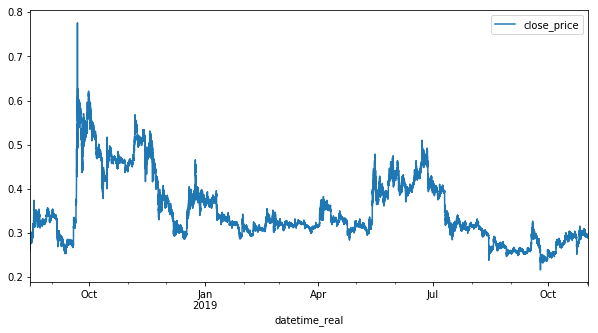

In [39]:
XRP_Data_resample_1min_ffill[['close_price']].plot(figsize = (10,5))

In [40]:
XRP_Data_resample_1min_ffill.tail(10)

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2019-11-01 15:50:00,1572623400000,0.29032,0.29029,0.29032,0.29029,18977.229740,1.572623e+12,60000.0,1.572623e+09
2019-11-01 15:51:00,1572623460000,0.29034,0.29030,0.29035,0.29030,11583.433064,1.572624e+12,60000.0,1.572623e+09
2019-11-01 15:52:00,1572623520000,0.29070,0.29046,0.29071,0.29046,205.000000,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:53:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,0.0,1.572624e+09
2019-11-01 15:54:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,120000.0,1.572624e+09
2019-11-01 15:55:00,1572623700000,0.29083,0.29173,0.29173,0.29083,1570.393827,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:56:00,1572623760000,0.29161,0.29150,0.29161,0.29120,4022.034331,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:57:00,1572623820000,0.29180,0.29154,0.29207,0.29154,6854.915950,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:58:00,1572623880000,0.29139,0.29030,0.29151,0.29030,8296.541362,1.572624e+12,60000.0,1.572624e+09



 selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush


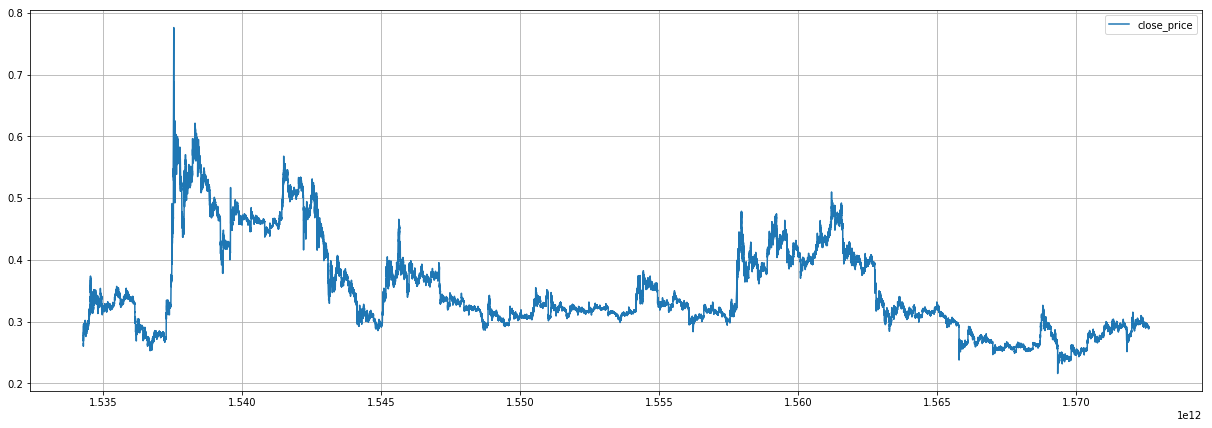

In [41]:
ploting_breakdown = XRP_Data_resample_1min_ffill.reset_index()

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close_price']

tran_x = ploting_breakdown['timestamp_UTC_millisec']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t



# plt.vlines(1534287600000, 0, 1, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()
print("\n selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush")

In [42]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
60,2018-08-15,1534291200000,0.27279,0.2734,0.27349,0.27279,17252.63782,1.534291e+12,60000.0,1.534291e+09


In [43]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
525660,2019-08-15,1565827200000,0.26373,0.26559,0.26559,0.26363,166192.961293,1.565827e+12,60000.0,1.565827e+09


## Saving Data 

In [44]:
#XRP_Data_backUp = XRP_Data_resample_1min_ffill.copy()

## Copy for testing

In [45]:
XRP_for_training =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1534287600) &
                           (XRP_Data_resample_1min_ffill['timestamp_UTC'] <1565823600)].reset_index().copy()

In [46]:
XRP_for_testing =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1565823600)].reset_index().copy()

In [47]:
XRP_for_testing.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
0,2019-08-14 23:00:00,1565823600000,0.27050,0.27034,0.27050,0.27032,200.000000,1.565824e+12,60000.0,1.565824e+09
1,2019-08-14 23:01:00,1565823660000,0.27034,0.27014,0.27034,0.27011,6970.610576,1.565824e+12,60000.0,1.565824e+09
2,2019-08-14 23:02:00,1565823720000,0.27015,0.27031,0.27044,0.27015,9002.533511,1.565824e+12,60000.0,1.565824e+09
3,2019-08-14 23:03:00,1565823780000,0.27028,0.27028,0.27034,0.27027,22726.951973,1.565824e+12,60000.0,1.565824e+09
4,2019-08-14 23:04:00,1565823840000,0.27015,0.26971,0.27015,0.26932,115833.923778,1.565824e+12,60000.0,1.565824e+09


In [48]:
XRP_for_testing['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [49]:
XRP_for_testing['datetime_real'].min()

Timestamp('2019-08-14 23:00:00')

## Analysis on training datasets

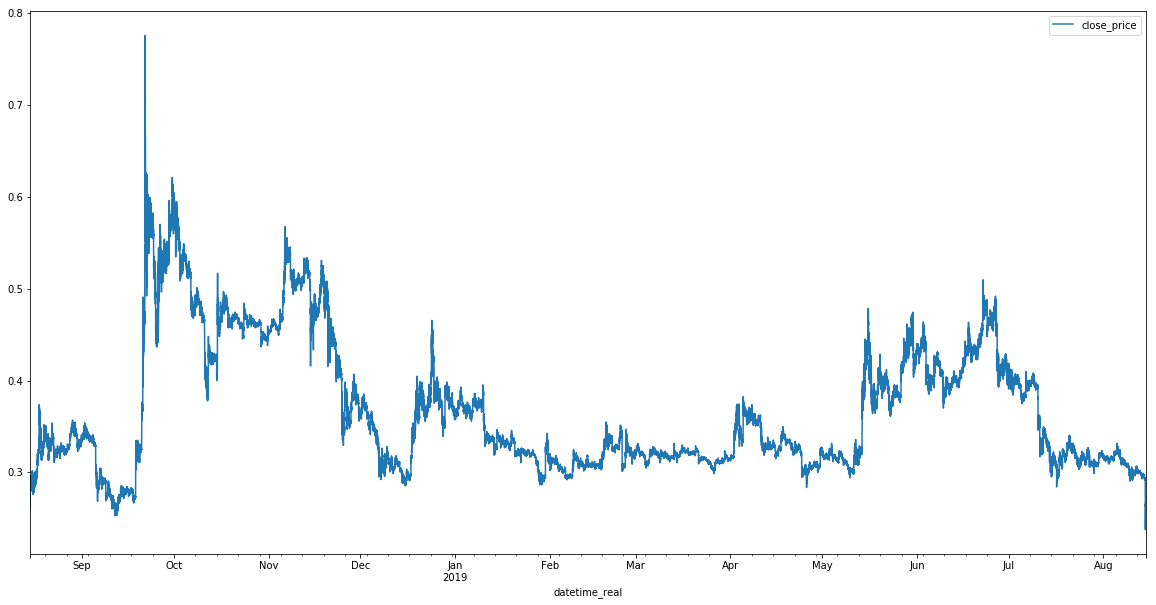

In [50]:
XRP_for_training.set_index('datetime_real')[['close_price']].plot(figsize = (20,10))

## Data mining, making own properties and features

In [51]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '3H': 180,
                    '4H': 240,
                    '5H': 300,
                    '6H': 360,
                    '7H': 420,
                    '8H': 480,
                    '9H': 540,
                    '10H': 600,
                    '11H': 660,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [52]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close_price'].rolling(v).mean()

In [53]:
compare_sequence = {}

In [54]:
for col_1 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [55]:
for k, val in compare_sequence.items():
    XRP_for_training[k] = (XRP_for_training[val[0]] - XRP_for_training[val[1]])/XRP_for_training[val[1]] 
#     print(k, val[0], val[1])

In [56]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close_price']-XRP_for_training[col])/XRP_for_training[col] 

In [57]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close_price'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_training['close_price'] - XRP_for_training['look_back_{}'.format(k)])/(v)
    XRP_for_training['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close_price'])/(v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


net_{net_percent}_percent is the net_percent + minimum for profit, 

i.e. net_01_percent = 0.1% + 0.003 = 0.004

In [58]:
net_01_percent = 0.004
net_02_percent = 0.007  # (for x percent, percent wrong needs to be taken into consideration)

In [59]:
look_forward_time_condition = ['calculate_look_forward_Percent_3min',
 'calculate_look_forward_Percent_4min',
 'calculate_look_forward_Percent_5min',
 'calculate_look_forward_Percent_10min',
 'calculate_look_forward_Percent_15min',
 'calculate_look_forward_Percent_20min',
 'calculate_look_forward_Percent_25min',
 'calculate_look_forward_Percent_30min',
 'calculate_look_forward_Percent_35min',
 'calculate_look_forward_Percent_40min',
 'calculate_look_forward_Percent_45min',
 'calculate_look_forward_Percent_50min',
 'calculate_look_forward_Percent_55min',
 'calculate_look_forward_Percent_1H',
 'calculate_look_forward_Percent_2H',
 'calculate_look_forward_Percent_3H',
 'calculate_look_forward_Percent_4H',
 'calculate_look_forward_Percent_5H',
 'calculate_look_forward_Percent_6H']

In [60]:
# Buy_in_decision = pd.DataFrame((XRP_for_training[['timestamp_UTC'] + [d for d in XRP_for_training.columns if '_forward_Percent_' in d]].set_index('timestamp_UTC') > net_02_percent).any(axis =1 )).rename(columns ={0: 'Buy_In'})
Buy_in_decision = pd.DataFrame((XRP_for_training[['timestamp_UTC'] + look_forward_time_condition].set_index('timestamp_UTC') > net_02_percent).any(axis =1 )).rename(columns ={0: 'Buy_In'})

In [61]:
within_target_02_profit = XRP_for_training.merge(Buy_in_decision.reset_index(), on ='timestamp_UTC', how='left').dropna()

In [120]:
XRP_for_training[XRP_for_training['timestamp_UTC_millisec'] >= 1561538700000]

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2D,calculate_look_forward_Percent_2D,calculate_look_back_Percent_3D,calculate_look_forward_Percent_3D,calculate_look_back_Percent_4D,calculate_look_forward_Percent_4D,calculate_look_back_Percent_5D,calculate_look_forward_Percent_5D,calculate_look_back_Percent_10D,calculate_look_forward_Percent_10D
454185,2019-06-26 08:45:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000206,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591
454186,2019-06-26 08:46:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000185,-0.001832,-0.000292,-0.001375,0.000168,-0.000905,0.000388,-0.000813,0.000355,-0.000591
454187,2019-06-26 08:47:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000159,-0.001815,-0.000297,-0.001348,0.000162,-0.000907,0.000385,-0.000808,0.000369,-0.000594
454188,2019-06-26 08:48:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000148,-0.001797,-0.000287,-0.001351,0.000161,-0.000908,0.000387,-0.000806,0.000357,-0.000592
454189,2019-06-26 08:49:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000148,-0.001743,-0.000287,-0.001354,0.000171,-0.000905,0.000385,-0.000806,0.000351,-0.000592
454190,2019-06-26 08:50:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000148,-0.001757,-0.000288,-0.001351,0.000173,-0.000891,0.000385,-0.000790,0.000352,-0.000592
454191,2019-06-26 08:51:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000164,-0.001759,-0.000288,-0.001358,0.000168,-0.000899,0.000385,-0.000802,0.000355,-0.000590
454192,2019-06-26 08:52:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000181,-0.001800,-0.000288,-0.001366,0.000160,-0.000899,0.000385,-0.000802,0.000351,-0.000590
454193,2019-06-26 08:53:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000174,-0.001790,-0.000301,-0.001366,0.000155,-0.000899,0.000386,-0.000811,0.000352,-0.000590
454194,2019-06-26 08:54:00,1561538700000,0.46801,0.46810,0.46810,0.46801,10000.000000,1.561539e+12,0.0,1.561539e+09,...,0.000173,-0.001772,-0.000301,-0.001370,0.000157,-0.000898,0.000386,-0.000807,0.000361,-0.000590


In [116]:
within_target_02_profit.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_forward_Percent_2D,calculate_look_back_Percent_3D,calculate_look_forward_Percent_3D,calculate_look_back_Percent_4D,calculate_look_forward_Percent_4D,calculate_look_back_Percent_5D,calculate_look_forward_Percent_5D,calculate_look_back_Percent_10D,calculate_look_forward_Percent_10D,Buy_In
16574,2018-08-24 23:00:00,1535151600000,0.32687,0.32709,0.32742,0.32687,32028.654097,1.535152e+12,60000.0,1.535152e+09,...,-0.000184,-0.000172,0.000133,0.000109,0.000440,-0.000248,0.000271,0.000436,0.000056,False
16575,2018-08-24 23:01:00,1535151660000,0.32709,0.32698,0.32709,0.32698,9644.315221,1.535152e+12,60000.0,1.535152e+09,...,-0.000180,-0.000185,0.000138,0.000137,0.000441,-0.000253,0.000274,0.000437,0.000056,False
16576,2018-08-24 23:02:00,1535151720000,0.32699,0.32691,0.32699,0.32691,14352.199593,1.535152e+12,60000.0,1.535152e+09,...,-0.000177,-0.000187,0.000123,0.000132,0.000441,-0.000254,0.000274,0.000435,0.000056,False
16577,2018-08-24 23:03:00,1535151780000,0.32691,0.32630,0.32691,0.32630,30312.173041,1.535152e+12,60000.0,1.535152e+09,...,-0.000156,-0.000194,0.000137,0.000159,0.000451,-0.000252,0.000283,0.000435,0.000060,True
16578,2018-08-24 23:04:00,1535151840000,0.32630,0.32616,0.32630,0.32616,6672.409474,1.535152e+12,60000.0,1.535152e+09,...,-0.000151,-0.000207,0.000140,0.000178,0.000443,-0.000254,0.000285,0.000435,0.000064,True


In [124]:
within_target_02_profit[within_target_02_profit['timestamp_UTC_millisec'] >= 1561538700000].head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_forward_Percent_2D,calculate_look_back_Percent_3D,calculate_look_forward_Percent_3D,calculate_look_back_Percent_4D,calculate_look_forward_Percent_4D,calculate_look_back_Percent_5D,calculate_look_forward_Percent_5D,calculate_look_back_Percent_10D,calculate_look_forward_Percent_10D,Buy_In
722219,2019-06-26 08:45:00,1561538700000,0.46801,0.4681,0.4681,0.46801,10000.0,1.561539e+12,0.0,1.561539e+09,...,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591,False
722220,2019-06-26 08:45:00,1561538700000,0.46801,0.4681,0.4681,0.46801,10000.0,1.561539e+12,0.0,1.561539e+09,...,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591,False
722221,2019-06-26 08:45:00,1561538700000,0.46801,0.4681,0.4681,0.46801,10000.0,1.561539e+12,0.0,1.561539e+09,...,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591,False
722222,2019-06-26 08:45:00,1561538700000,0.46801,0.4681,0.4681,0.46801,10000.0,1.561539e+12,0.0,1.561539e+09,...,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591,False
722223,2019-06-26 08:45:00,1561538700000,0.46801,0.4681,0.4681,0.46801,10000.0,1.561539e+12,0.0,1.561539e+09,...,-0.001857,-0.000275,-0.001382,0.000168,-0.000915,0.000392,-0.000803,0.000333,-0.000591,False


In [63]:
XRP_for_testing['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [64]:
within_target_02_profit['datetime_real'].min()

Timestamp('2018-08-24 23:00:00')

#### Selecting properties and becareful not to have any properties that look forward

In [65]:
[d for d in list(XRP_for_training.columns) if 'look_forward_' not in d]

['datetime_real',
 'timestamp_UTC_millisec',
 'open_price',
 'close_price',
 'highest_price',
 'lowest_price',
 'volume',
 'checking_timestamp_UTC_millisec',
 'dif',
 'timestamp_UTC',
 '3min_RA_on_Close',
 '4min_RA_on_Close',
 '5min_RA_on_Close',
 '10min_RA_on_Close',
 '15min_RA_on_Close',
 '20min_RA_on_Close',
 '25min_RA_on_Close',
 '30min_RA_on_Close',
 '35min_RA_on_Close',
 '40min_RA_on_Close',
 '45min_RA_on_Close',
 '50min_RA_on_Close',
 '55min_RA_on_Close',
 '1H_RA_on_Close',
 '2H_RA_on_Close',
 '3H_RA_on_Close',
 '4H_RA_on_Close',
 '5H_RA_on_Close',
 '6H_RA_on_Close',
 '7H_RA_on_Close',
 '8H_RA_on_Close',
 '9H_RA_on_Close',
 '10H_RA_on_Close',
 '11H_RA_on_Close',
 '12H_RA_on_Close',
 '24H_RA_on_Close',
 '2D_RA_on_Close',
 '3D_RA_on_Close',
 '4D_RA_on_Close',
 '5D_RA_on_Close',
 '10D_RA_on_Close',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_25min',
 '3min_minus_30min',
 '3min_minus_35min',
 '3min_minus_40min',

In [66]:
properties = [
#     'close',
#  'date',
#  'high',
#  'low',
#  'open',
#  'quoteVolume',
 'volume',
#  'weightedAverage',
#  'datetime_real',
 '3min_close_percent_dif',
 '4min_close_percent_dif',
 '5min_close_percent_dif',
 '10min_close_percent_dif',
 '15min_close_percent_dif',
 '20min_close_percent_dif',
 '1H_close_percent_dif',
 '2H_close_percent_dif',
 '4H_close_percent_dif',
 '12H_close_percent_dif',
 '24H_close_percent_dif',
 '2D_close_percent_dif',
 '3D_close_percent_dif',
 '4D_close_percent_dif',
 '5D_close_percent_dif',
 '10D_close_percent_dif',
 'calculate_look_back_Percent_3min',
 'calculate_look_back_Percent_4min',
 'calculate_look_back_Percent_5min',
 'calculate_look_back_Percent_10min',
 'calculate_look_back_Percent_15min',
 'calculate_look_back_Percent_20min',
 'calculate_look_back_Percent_1H',
 'calculate_look_back_Percent_2H',
 'calculate_look_back_Percent_4H',
 'calculate_look_back_Percent_12H',
 'calculate_look_back_Percent_24H',
 'calculate_look_back_Percent_2D',
 'calculate_look_back_Percent_3D',
 'calculate_look_back_Percent_4D',
 'calculate_look_back_Percent_5D',
 'calculate_look_back_Percent_10D',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_1H',
 '3min_minus_2H',
 '3min_minus_4H',
 '3min_minus_12H',
 '3min_minus_24H',
 '3min_minus_2D',
 '3min_minus_3D',
 '3min_minus_4D',
 '3min_minus_5D',
 '3min_minus_10D',
 '4min_minus_5min',
 '4min_minus_10min',
 '4min_minus_15min',
 '4min_minus_20min',
 '4min_minus_1H',
 '4min_minus_2H',
 '4min_minus_4H',
 '4min_minus_12H',
 '4min_minus_24H',
 '4min_minus_2D',
 '4min_minus_3D',
 '4min_minus_4D',
 '4min_minus_5D',
 '4min_minus_10D',
 '5min_minus_10min',
 '5min_minus_15min',
 '5min_minus_20min',
 '5min_minus_1H',
 '5min_minus_2H',
 '5min_minus_4H',
 '5min_minus_12H',
 '5min_minus_24H',
 '5min_minus_2D',
 '5min_minus_3D',
 '5min_minus_4D',
 '5min_minus_5D',
 '5min_minus_10D',
 '10min_minus_15min',
 '10min_minus_20min',
 '10min_minus_1H',
 '10min_minus_2H',
 '10min_minus_4H',
 '10min_minus_12H',
 '10min_minus_24H',
 '10min_minus_2D',
 '10min_minus_3D',
 '10min_minus_4D',
 '10min_minus_5D',
 '10min_minus_10D',
 '15min_minus_20min',
 '15min_minus_1H',
 '15min_minus_2H',
 '15min_minus_4H',
 '15min_minus_12H',
 '15min_minus_24H',
 '15min_minus_2D',
 '15min_minus_3D',
 '15min_minus_4D',
 '15min_minus_5D',
 '15min_minus_10D',
 '20min_minus_1H',
 '20min_minus_2H',
 '20min_minus_4H',
 '20min_minus_12H',
 '20min_minus_24H',
 '20min_minus_2D',
 '20min_minus_3D',
 '20min_minus_4D',
 '20min_minus_5D',
 '20min_minus_10D',
 '1H_minus_2H',
 '1H_minus_4H',
 '1H_minus_12H',
 '1H_minus_24H',
 '1H_minus_2D',
 '1H_minus_3D',
 '1H_minus_4D',
 '1H_minus_5D',
 '1H_minus_10D',
 '2H_minus_4H',
 '2H_minus_12H',
 '2H_minus_24H',
 '2H_minus_2D',
 '2H_minus_3D',
 '2H_minus_4D',
 '2H_minus_5D',
 '2H_minus_10D',
 '4H_minus_12H',
 '4H_minus_24H',
 '4H_minus_2D',
 '4H_minus_3D',
 '4H_minus_4D',
 '4H_minus_5D',
 '4H_minus_10D',
 '12H_minus_24H',
 '12H_minus_2D',
 '12H_minus_3D',
 '12H_minus_4D',
 '12H_minus_5D',
 '12H_minus_10D',
 '24H_minus_2D',
 '24H_minus_3D',
 '24H_minus_4D',
 '24H_minus_5D',
 '24H_minus_10D',
 '2D_minus_3D',
 '2D_minus_4D',
 '2D_minus_5D',
 '2D_minus_10D',
 '3D_minus_4D',
 '3D_minus_5D',
 '3D_minus_10D',
 '4D_minus_5D',
 '4D_minus_10D',
 '5D_minus_10D']

## split into target and properties

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [68]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import pydot

In [69]:
from collections import Counter

In [70]:
import math

In [71]:
within_target_02_profit['datetime_real'].max()

Timestamp('2019-08-04 22:59:00')

In [72]:
target_y = within_target_02_profit[['Buy_In']].copy()

In [73]:
train_x = within_target_02_profit[properties].copy()

In [74]:
train_x.columns

Index(['volume', '3min_close_percent_dif', '4min_close_percent_dif',
       '5min_close_percent_dif', '10min_close_percent_dif',
       '15min_close_percent_dif', '20min_close_percent_dif',
       '1H_close_percent_dif', '2H_close_percent_dif', '4H_close_percent_dif',
       ...
       '2D_minus_3D', '2D_minus_4D', '2D_minus_5D', '2D_minus_10D',
       '3D_minus_4D', '3D_minus_5D', '3D_minus_10D', '4D_minus_5D',
       '4D_minus_10D', '5D_minus_10D'],
      dtype='object', length=153)

In [75]:
target_y.columns

Index(['Buy_In'], dtype='object')

In [76]:
# X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, test_size=0.33, random_state=324)

In [77]:
X_train_order = train_x.iloc[:-math.floor(len(train_x)*0.2)]

In [78]:
y_train_order = target_y.iloc[:-math.floor(len(target_y)*0.2)]

In [79]:
X_test_order = train_x.iloc[-math.floor(len(train_x)*0.2):]

In [80]:
y_test_order = target_y.iloc[-math.floor(len(target_y)*0.2):]

## Logistical Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [82]:
prob_logistical_training= LogisticRegression()


In [83]:
prob_logistical_training.fit(X_train_order, y_train_order)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
y_pred = prob_logistical_training.predict(X_test_order)


In [85]:
confusion_matrix(y_test_order, y_pred)

array([[128725,     32],
       [ 55746,    113]], dtype=int64)

In [86]:
prodicted_probs = prob_logistical_training.predict_proba(X_test_order)

In [87]:
X_test_order['predict_prob'] = [(d[0], d[1]) for d in prodicted_probs]

In [88]:
X_test_order['actual'] = y_test_order

In [89]:
X_test_order['predict'] = y_pred

In [90]:
X_test_order['negative_buy_in'] = [d[0] for d in X_test_order['predict_prob']]

In [91]:
X_test_order['positive_buy_in'] = [d[1] for d in X_test_order['predict_prob']]

In [92]:
X_test_order['positive_buy_in'].min()

0.2920810621578454

In [93]:
X_test_order['positive_buy_in'].max()

0.9633618047986034

In [94]:
X_test_order['negative_buy_in'].min()

0.03663819520139655

In [95]:
X_test_order['negative_buy_in'].max()

0.7079189378421546

In [99]:
within_target_02_profit.tail()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_forward_Percent_2D,calculate_look_back_Percent_3D,calculate_look_forward_Percent_3D,calculate_look_back_Percent_4D,calculate_look_forward_Percent_4D,calculate_look_back_Percent_5D,calculate_look_forward_Percent_5D,calculate_look_back_Percent_10D,calculate_look_forward_Percent_10D,Buy_In
939653,2019-08-04 22:55:00,1564959300000,0.31898,0.31936,0.31937,0.31898,1606.088399,1.564959e+12,60000.0,1.564959e+09,...,-0.000320,0.000069,-0.000161,0.000020,-0.000192,0.000014,-0.000329,0.000035,-0.000340,False
939654,2019-08-04 22:56:00,1564959360000,0.31943,0.31943,0.31943,0.31943,50.000000,1.564959e+12,60000.0,1.564959e+09,...,-0.000318,0.000069,-0.000144,0.000017,-0.000204,0.000017,-0.000333,0.000035,-0.000341,False
939655,2019-08-04 22:57:00,1564959420000,0.31921,0.31917,0.31921,0.31911,300.000000,1.564959e+12,60000.0,1.564959e+09,...,-0.000309,0.000063,-0.000156,0.000018,-0.000199,0.000015,-0.000329,0.000040,-0.000338,True
939656,2019-08-04 22:58:00,1564959480000,0.31904,0.31918,0.31918,0.31849,74707.171136,1.564960e+12,60000.0,1.564959e+09,...,-0.000309,0.000071,-0.000154,0.000019,-0.000197,0.000017,-0.000326,0.000035,-0.000337,False
939657,2019-08-04 22:59:00,1564959540000,0.31925,0.31911,0.31930,0.31911,150.000000,1.564960e+12,60000.0,1.564960e+09,...,-0.000307,0.000070,-0.000154,0.000013,-0.000196,0.000018,-0.000327,0.000035,-0.000338,False


In [100]:
X_test_order.tail()

,volume,3min_close_percent_dif,4min_close_percent_dif,5min_close_percent_dif,10min_close_percent_dif,15min_close_percent_dif,20min_close_percent_dif,1H_close_percent_dif,2H_close_percent_dif,4H_close_percent_dif,...,3D_minus_5D,3D_minus_10D,4D_minus_5D,4D_minus_10D,5D_minus_10D,predict_prob,actual,predict,negative_buy_in,positive_buy_in
939653,1606.088399,0.000585,-0.000094,-0.000382,-0.001588,-0.001713,-0.001936,-0.003298,-0.004828,-0.006910,...,-0.002002,0.003491,-0.002337,0.003154,0.005504,"(0.6220810146649458, 0.3779189853350542)",False,False,0.622081,0.377919
939654,50.000000,0.000794,0.000658,0.000144,-0.001223,-0.001321,-0.001533,-0.002994,-0.004530,-0.006653,...,-0.002000,0.003492,-0.002337,0.003153,0.005503,"(0.6226666536369857, 0.3773333463630143)",False,False,0.622667,0.377333
939655,300.000000,-0.000345,-0.000219,-0.000288,-0.001833,-0.001964,-0.002269,-0.003712,-0.005262,-0.007424,...,-0.001998,0.003493,-0.002337,0.003152,0.005503,"(0.6226551217633021, 0.377344878236698)",True,False,0.622655,0.377345
939656,74707.171136,-0.000438,-0.000227,-0.000144,-0.001330,-0.001776,-0.002121,-0.003575,-0.005148,-0.007351,...,-0.001997,0.003494,-0.002337,0.003152,0.005502,"(0.5993616619062847, 0.4006383380937153)",False,False,0.599362,0.400638
939657,150.000000,-0.000470,-0.000548,-0.000401,-0.001155,-0.001868,-0.002164,-0.003693,-0.005295,-0.007528,...,-0.001995,0.003495,-0.002337,0.003151,0.005501,"(0.622774349183532, 0.3772256508164679)",False,False,0.622774,0.377226


In [101]:
to_csv_file = X_test_order.merge(within_target_02_profit[['datetime_real',
                                                          'timestamp_UTC_millisec',
                                                          'open_price',
                                                          'close_price',
                                                          'highest_price',
                                                          'lowest_price',
                                                          'volume',
                                                          'checking_timestamp_UTC_millisec']],
                                left_index=True,
                                right_index=True,
                                how='left')

In [114]:
within_target_02_profit[['datetime_real',
                                                          'timestamp_UTC_millisec',
                                                          'open_price',
                                                          'close_price',
                                                          'highest_price',
                                                          'lowest_price',
                                                          'volume',
                                                          'checking_timestamp_UTC_millisec']].loc[755044]

datetime_real                      2019-06-26 10:46:00
timestamp_UTC_millisec                   1561538700000
open_price                                     0.46801
close_price                                     0.4681
highest_price                                   0.4681
lowest_price                                   0.46801
volume                                           10000
checking_timestamp_UTC_millisec            1.56154e+12
Name: 755044, dtype: object

In [107]:
X_test_order

,volume,3min_close_percent_dif,4min_close_percent_dif,5min_close_percent_dif,10min_close_percent_dif,15min_close_percent_dif,20min_close_percent_dif,1H_close_percent_dif,2H_close_percent_dif,4H_close_percent_dif,...,3D_minus_5D,3D_minus_10D,4D_minus_5D,4D_minus_10D,5D_minus_10D,predict_prob,actual,predict,negative_buy_in,positive_buy_in
755042,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755043,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755044,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755045,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755046,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755047,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755048,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755049,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755050,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498
755051,10000.000000,3.344188e-14,-1.778823e-14,-2.846118e-15,1.316329e-14,8.656941e-15,1.031718e-14,-1.612800e-14,-2.371765e-15,-0.001123,...,0.004217,0.041076,0.009962,0.047032,0.036704,"(0.6115015823073581, 0.38849841769264193)",False,False,0.611502,0.388498


In [103]:
to_csv_file.to_csv('linear_reg_prob.csv')

## Testing theory

In [156]:
XRP_for_testing.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
0,2019-08-14 23:00:00,1565823600000,0.27050,0.27034,0.27050,0.27032,200.000000,1.565824e+12,60000.0,1.565824e+09
1,2019-08-14 23:01:00,1565823660000,0.27034,0.27014,0.27034,0.27011,6970.610576,1.565824e+12,60000.0,1.565824e+09
2,2019-08-14 23:02:00,1565823720000,0.27015,0.27031,0.27044,0.27015,9002.533511,1.565824e+12,60000.0,1.565824e+09
3,2019-08-14 23:03:00,1565823780000,0.27028,0.27028,0.27034,0.27027,22726.951973,1.565824e+12,60000.0,1.565824e+09
4,2019-08-14 23:04:00,1565823840000,0.27015,0.26971,0.27015,0.26932,115833.923778,1.565824e+12,60000.0,1.565824e+09


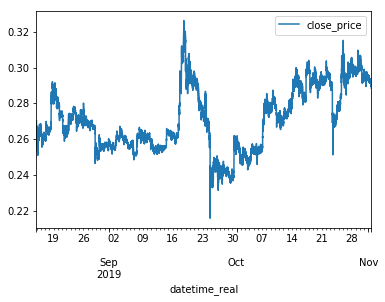

In [157]:
XRP_for_testing[['close_price','datetime_real']].set_index('datetime_real').plot()

In [158]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '4H': 240,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [159]:
for k,v in section_period.items():
    XRP_for_testing['{0}_RA_on_Close'.format(k)] = XRP_for_testing['close_price'].rolling(v).mean()

In [160]:
compare_sequence = {}

In [161]:
for col_1 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [162]:
for k, val in compare_sequence.items():
    XRP_for_testing[k] = (XRP_for_testing[val[0]] - XRP_for_testing[val[1]])/XRP_for_testing[val[1]] 
#     print(k, val[0], val[1])

In [163]:
for col in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    XRP_for_testing[col] = XRP_for_testing[col].shift(1)
    
    XRP_for_testing['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_testing['close_price']-XRP_for_testing[col])/XRP_for_testing[col] 

In [164]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['look_back_{}'.format(k)] = XRP_for_testing['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
#     XRP_for_testing['look_forward_{}'.format(k)] = XRP_for_testing['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_testing['close_price'] - XRP_for_testing['look_back_{}'.format(k)])/(5*v)
#     XRP_for_testing['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_testing['look_forward_{}'.format(k)] - XRP_for_testing['close'])/(5*v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


In [ ]:
## FInd out WHY:
- XRP_for_testing_drop_na[properties].dropna() is different to XRP_for_testing.dropna()

In [185]:
XRP_for_testing_drop_na = XRP_for_testing.dropna()

In [186]:
Counter(xg_reg.predict(XRP_for_testing_drop_na[properties]))

Counter({False: 86132, True: 12807})

In [187]:
#(buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna()))

In [188]:
len(XRP_for_testing.dropna())

98939

In [189]:
len(XRP_for_testing_drop_na)

98939

In [190]:
len(XRP_for_testing.dropna())

98939

In [191]:
len(xg_reg.predict(XRP_for_testing_drop_na[properties]))

98939